# Pendulum system using Lagrange's equation

Defines a LagrangianPendulum class that is used to generate basic pendulum plots from solving Lagrange's equations.

In [11]:
%matplotlib inline

In [12]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [13]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [14]:
class LagrangianDoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of pendulum 1
    L2 : float
        length of pendulum 2
    g : float
        gravitational acceleration at the earth's surface
    mass1 : float
        mass of pendulum 1
    mass2 : float
        mass of pendulum 2

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., mass1=1., L2=1., mass2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.mass1 = mass1
        self.mass2 = mass2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi1/dt d^2phi1/dt^2 dphi2/dt d^2phi2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi1(t), y[1] = dphi1/dt, y[2] = phi2(t) and y[3] = dphi2/dt
            
        Returns
        -------
        
        """
        a1 = (self.L2 / self.L1) * (self.mass2 / (self.mass1 + self.mass2)) * np.cos(y[0] - y[2])
        a2 = (self.L1 / self.L2) * np.cos(y[0] - y[2])
        f1 = -1. * (self.L2 / self.L1) * (self.mass2 / (self.mass1 + self.mass2)) * (y[3])**2 * np.sin(y[0] - y[2]) - self.g * np.sin(y[0]) / self.L1            
        f2 = (self.L1 / self.L2) * (y[1])**2 * np.sin(y[0] - y[2]) - self.g * np.sin(y[2]) / self.L2  
        
        return [y[1], (f1 - a1 * f2) / (1 - a1 * a2), y[3], (-a2 * f1 + f2) / (1 - a1 * a2)]
    
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

In [14]:
class LagrangianTriplePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of pendulum 1
    L2 : float
        length of pendulum 2
    L3 : float
        length of pendulum 3
    g : float
        gravitational acceleration at the earth's surface
    mass1 : float
        mass of pendulum 1
    mass2 : float
        mass of pendulum 2
    mass3 : float
        mass of pendulum 3    

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., mass1=1., L2=1., mass2=1., L3=1., mass3=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3
        self.g = g
        self.mass1 = mass1
        self.mass2 = mass2
        self.mass3 = mass3
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi1/dt d^2phi1/dt^2 dphi2/dt d^2phi2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 6-component vector with y[0] = phi1(t), y[1] = dphi1/dt, y[2] = phi2(t), y[3] = dphi2/dt, 
            y[4] = phi2(t) and y[5] = dphi2/dt
            
        Returns
        -------

        """
        a1 = (self.L2 / self.L1) * (self.mass2 / (self.mass1 + self.mass2)) * np.cos(y[0] - y[2])
        a2 = (self.L1 / self.L2) * np.cos(y[0] - y[2])
        f1 = -1. * (self.L2 / self.L1) * (self.mass2 / (self.mass1 + self.mass2)) * (y[3])**2 * np.sin(y[0] - y[2]) - self.g * np.sin(y[0]) / self.L1            
        f2 = (self.L1 / self.L2) * (y[1])**2 * np.sin(y[0] - y[2]) - self.g * np.sin(y[2]) / self.L2  
        
        return [y[1], (f1 - a1 * f2) / (1 - a1 * a2), y[3], (-a2 * f1 + f2) / (1 - a1 * a2)]
    
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

In [15]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [16]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make double pendulum plots 

In [17]:
# Labels for individual plot axes
phi1_vs_time_labels = (r'$t$', r'$\phi_1(t)$')
phi1_dot_vs_time_labels = (r'$t$', r'$d\phi_1/dt(t)$')
state_space1_labels = (r'$\phi_1$', r'$d\phi_1/dt$')
phi2_vs_time_labels = (r'$t$', r'$\phi_2(t)$')
phi2_dot_vs_time_labels = (r'$t$', r'$d\phi_2/dt(t)$')
state_space2_labels = (r'$\phi_2$', r'$d\phi_2/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
mass1 = 1.
mass2 = 1.

# Instantiate a pendulum 
p1 = LagrangianDoublePendulum(L1=L1, L2=L2, g=g, mass1=mass1, mass2=mass2)


In [21]:
phi1_0 = (3./4.)*np.pi
phi1_dot_0 = 0.
phi2_0 = (1./4.)*np.pi
phi2_dot_0 = 0.
phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)


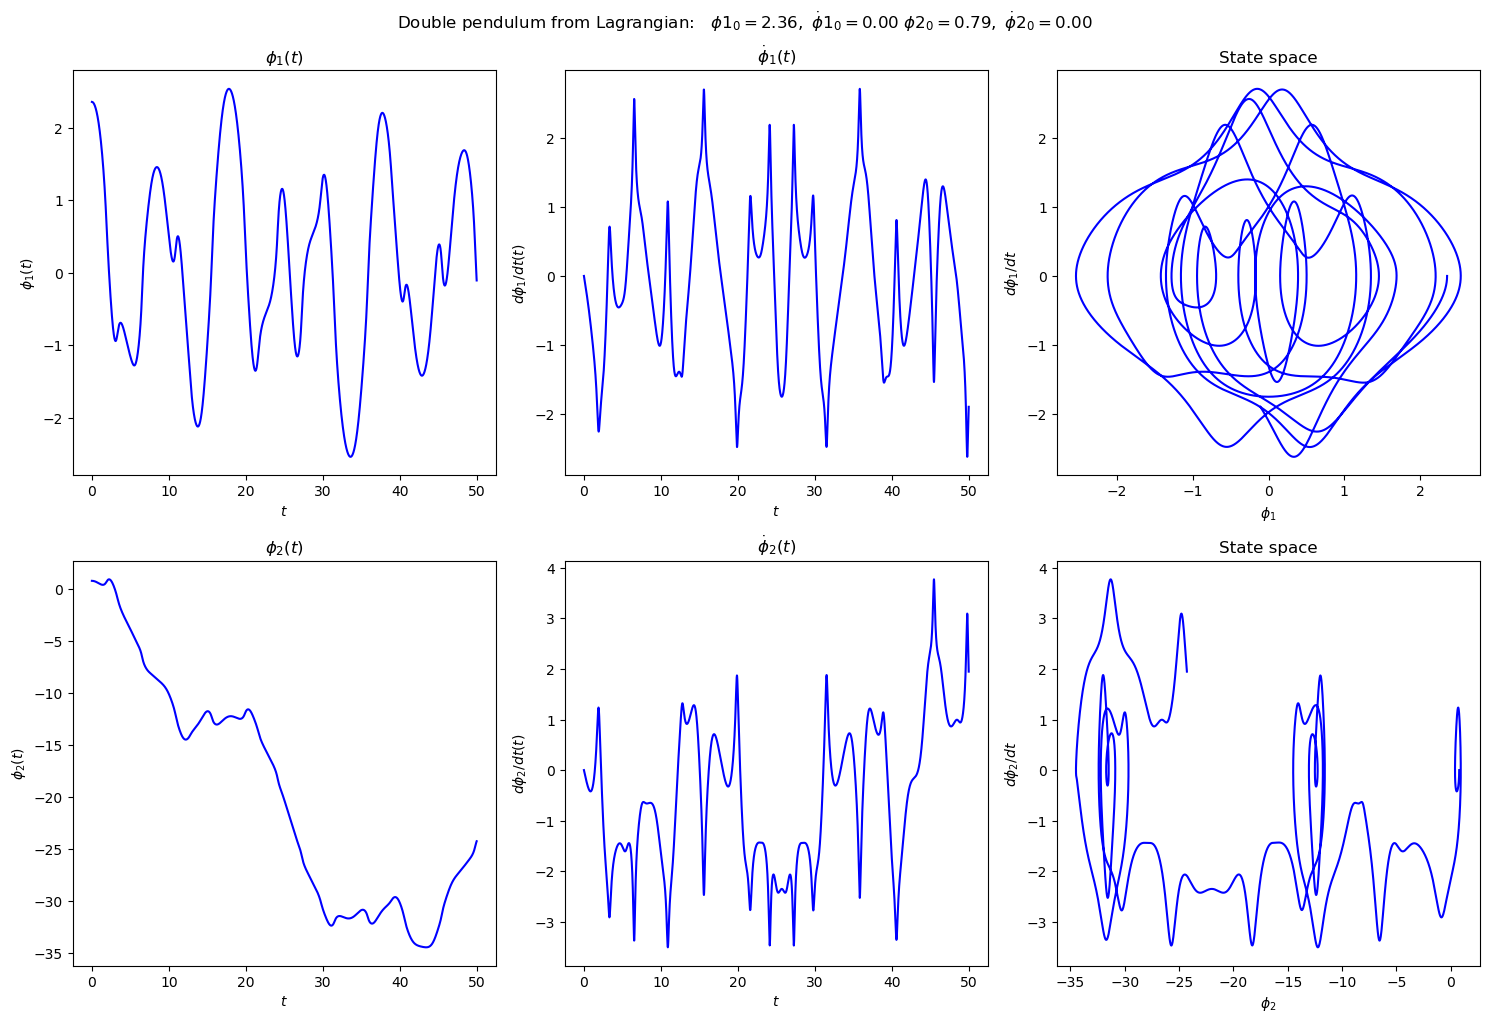

In [29]:
# both plots: same initial conditions
phi1_0 = (3./4.)*np.pi
phi1_dot_0 = 0.
phi2_0 = (1./4.)*np.pi
phi2_dot_0 = 0.
phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)


# start the plot!
fig = plt.figure(figsize=(15,10))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0:.2f}$' + \
                rf' $\phi2_0 = {phi2_0:.2f},$' + \
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi1 plot 
ax_a = fig.add_subplot(2,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi1_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_1(t)$', 
            ax=ax_a)    
                              
# second plot: phi1_dot plot 
ax_b = fig.add_subplot(2,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_dot[start : stop], 
            axis_labels=phi1_dot_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_1(t)$', 
            ax=ax_b)    

# third plot: state space 1 plot
ax_c = fig.add_subplot(2,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], phi1_dot[start : stop], 
            axis_labels=state_space1_labels, 
            color='blue',
            label=None, 
            title='State space', 
            ax=ax_c)    

# fourth plot: phi2 plot 
ax_d = fig.add_subplot(2,3,4)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi2_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_2(t)$', 
            ax=ax_d)    
                              
# fifth plot: phi2_dot plot 
ax_e = fig.add_subplot(2,3,5)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2_dot[start : stop], 
            axis_labels=phi2_dot_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_2(t)$', 
            ax=ax_e)    

# sixth plot: state space 2 plot 
ax_f = fig.add_subplot(2,3,6)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2[start : stop], phi2_dot[start : stop], 
            axis_labels=state_space2_labels, 
            color='blue',
            label=None, 
            title='State space', 
            ax=ax_f) 

fig.tight_layout()
#fig.savefig('double_pendulum_Lagrange.png', bbox_inches='tight')  

Now add one more pendulum to the system, and use widgets to animate the system: